In [1]:
#### Necessary libraries ####
import numpy as np              # Numpy is the fundamental package for scientific computing in Python.
import matplotlib.pyplot as plt # Matplotlib is a scientific plotting package.
from combine_data import read_data_pakistan

# The statement below enforces the plots to be put into this notebook, instead of in their own windows.
%matplotlib inline

In [2]:
basedir = "../results/05 27 Moisture tracking intercomparison/Pakistan/"

all_maps = read_data_pakistan(basedir)

corr_matrix = np.zeros((len(all_maps.keys()), len(all_maps.keys())))

for i, (name1, dataset1) in enumerate(all_maps.data_vars.items()):
    print(name1)
    for j, (name2, dataset2) in enumerate(all_maps.data_vars.items()):
        nanind = ~np.isnan(dataset1.values) & ~np.isnan(dataset2.values)
        corr_matrix[i,j] = np.corrcoef(dataset1.values[nanind], dataset2.values[nanind])[1,0]

2ldrm
flexpart_uib
flexpart_univie
lagranto_CHc
flexpart_xu
flexpart_tatfancheng
TRACMASS
ghent_e5
ghent_e4
ghent_e3
ghent_e2
ghent_e1
utrack_e5
utrack_e4
utrack_e3
utrack_e2
utrack_e1
Vigo_e2_Sodemann
Vigo_e1_Stohl
wam2layers_new


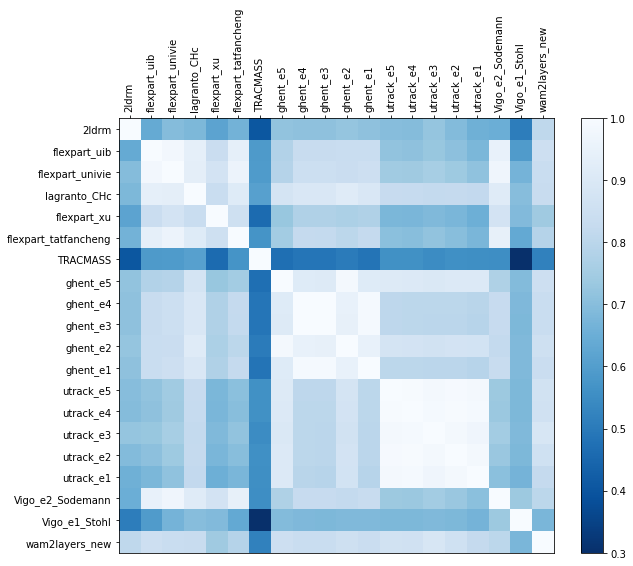

In [3]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.imshow(corr_matrix, vmin=0.3, vmax=1, cmap='Blues_r')
plt.xticks(np.arange(len(all_maps.keys())))
plt.yticks(np.arange(len(all_maps.keys())))
ax.set_xticklabels(all_maps.keys(), rotation=90)
ax.set_yticklabels(all_maps.keys())
ax.xaxis.tick_top()
plt.colorbar()
plt.savefig('corr_matrix.png')